# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step1: Data Loading

In [2]:
# Load data
X = pd.read_csv("CATSnDOGS.csv").values
y = pd.read_csv("Labels.csv").values.ravel()

In [3]:
X.shape

(198, 4096)

In [4]:
y.shape

(198,)

In [5]:
# Define rotate function
def rotateM(x):
    return np.flip(x, axis=0).T

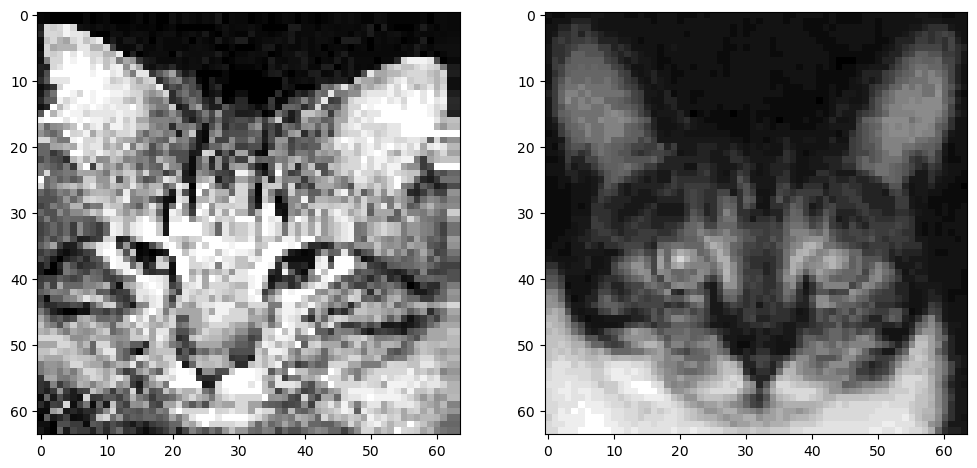

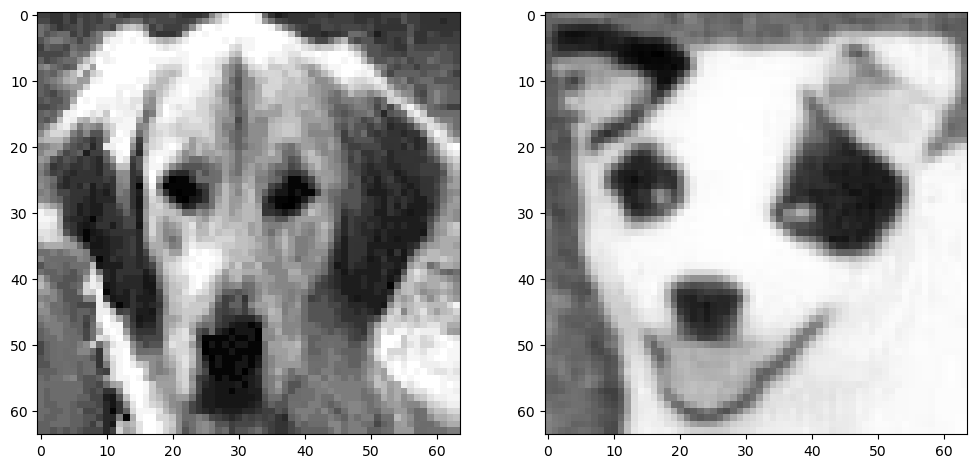

In [14]:
# Plot CATnDOGS images

# Set random seed
random.seed(1000012)

# Set plot size
plt.rcParams['figure.figsize'] = [12, 6]

# Generate random indices
ssc = random.sample(list(np.where(y == 0)[0]), 2)
ssd = random.sample(list(np.where(y == 1)[0]), 2)

# Plot images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotateM(X[ssc[0], :].reshape(64, 64)), cmap='gray')
plt.xlabel("")
plt.ylabel("")

plt.subplot(1, 2, 2)
plt.imshow(rotateM(X[ssc[1], :].reshape(64, 64)), cmap='gray')
plt.xlabel("")
plt.ylabel("")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotateM(X[ssd[0], :].reshape(64, 64)), cmap='gray')
plt.xlabel("")
plt.ylabel("")

plt.subplot(1, 2, 2)
plt.imshow(rotateM(X[ssd[1], :].reshape(64, 64)), cmap='gray')
plt.xlabel("")
plt.ylabel("")

plt.show()

# Step 2: Introducing Noise

In [6]:
# Add noise to the dataset
def add_noise(data, noise_level):
    noisy_data = data.copy()
    num_noise_pixels = int(noise_level * 4096)  # 64x64 = 4096
    for i in range(len(noisy_data)):
        noise_indices = random.sample(range(4096), num_noise_pixels)
        # Generate random noise values for each noisy pixel
        noisy_values = np.random.randint(0, 256, num_noise_pixels)
        noisy_data[i, noise_indices] = noisy_values
    return noisy_data

# Define noise levels to simulate increasing class overlap
noise_levels = [0, 0.2, 0.4, 0.6, 0.8]  # Example noise levels, adjust as needed

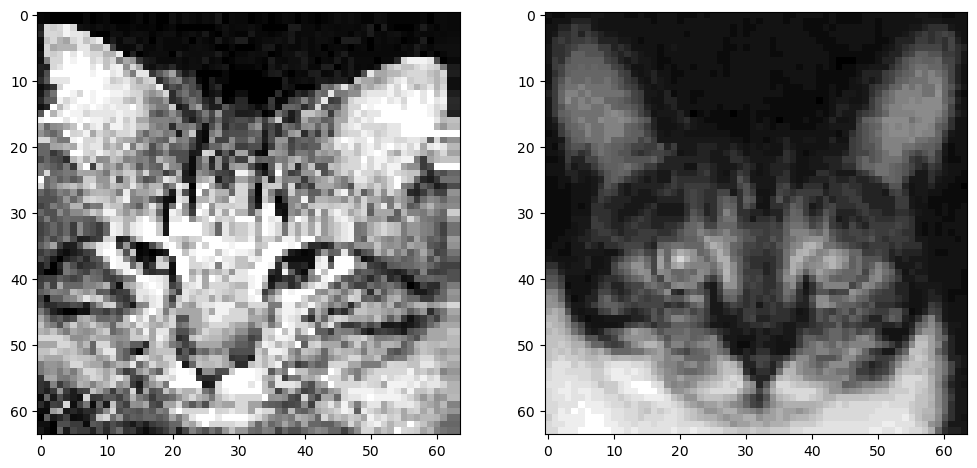

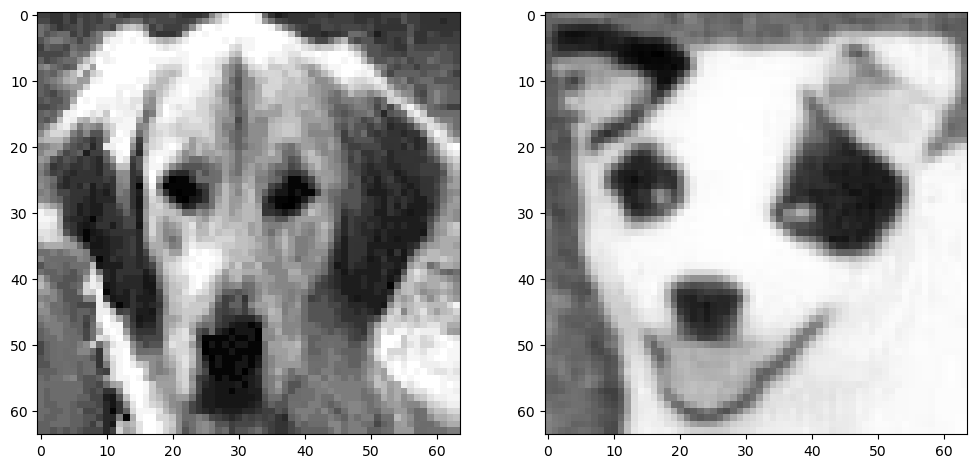

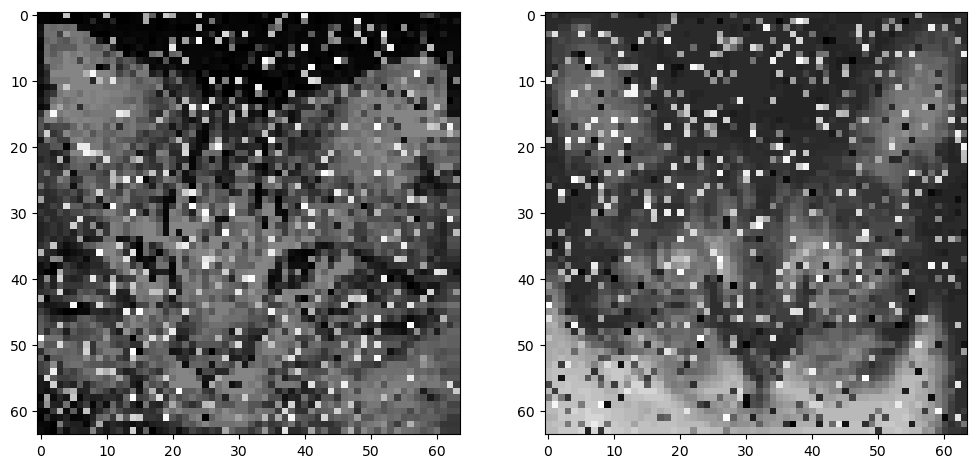

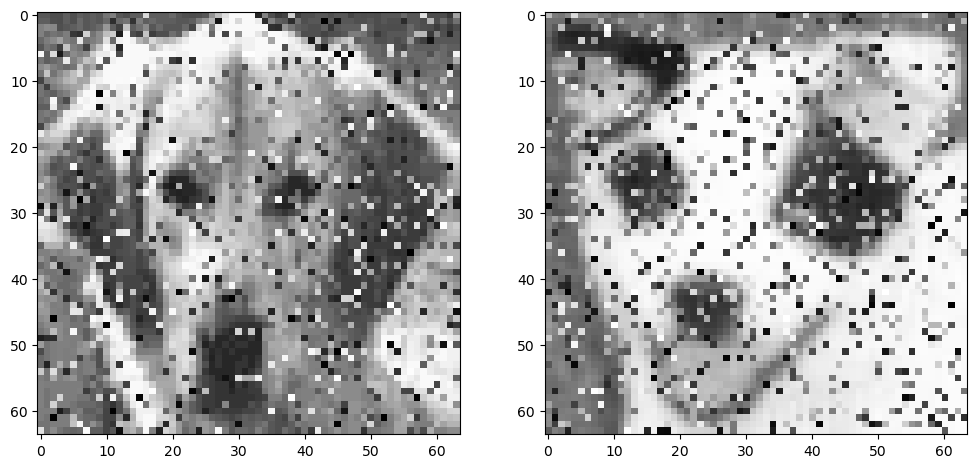

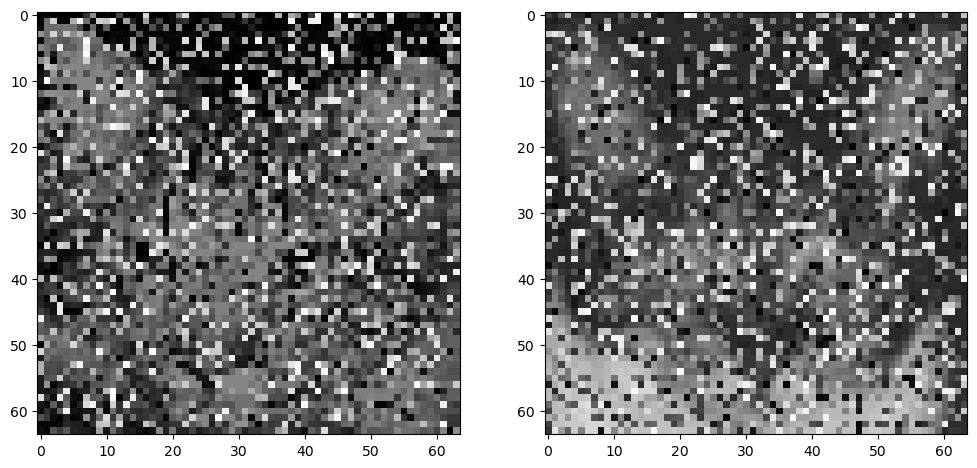

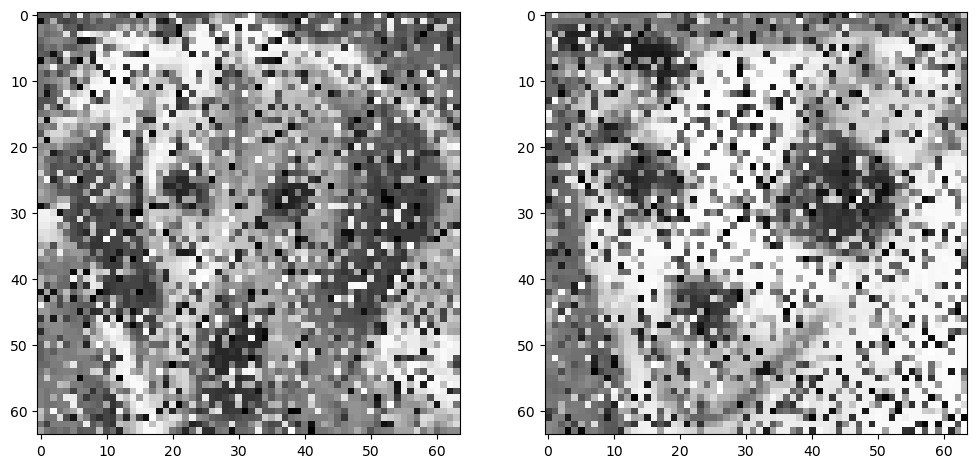

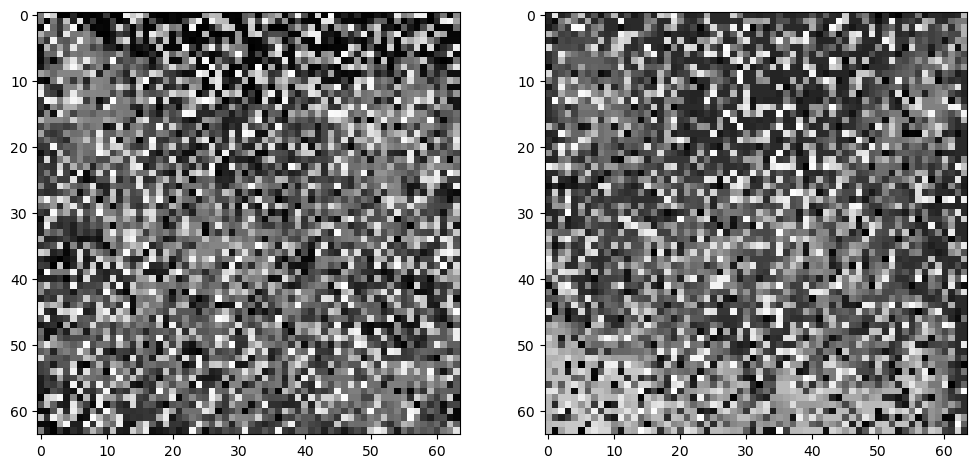

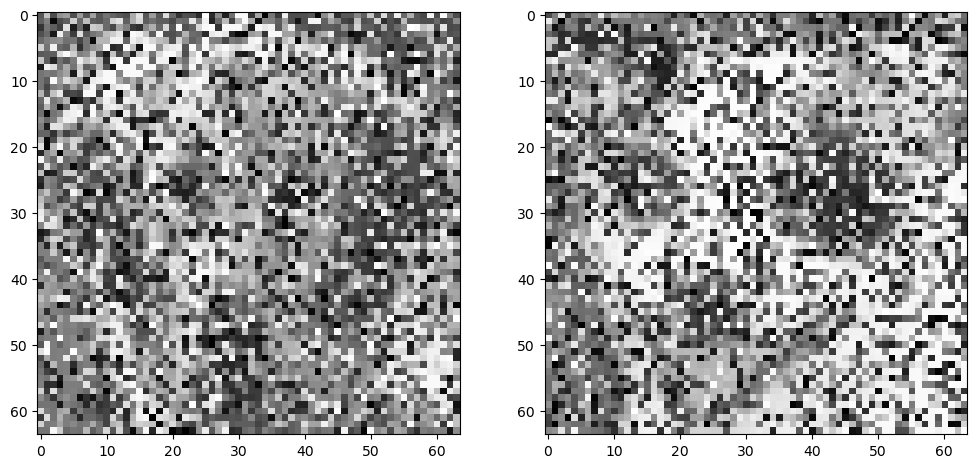

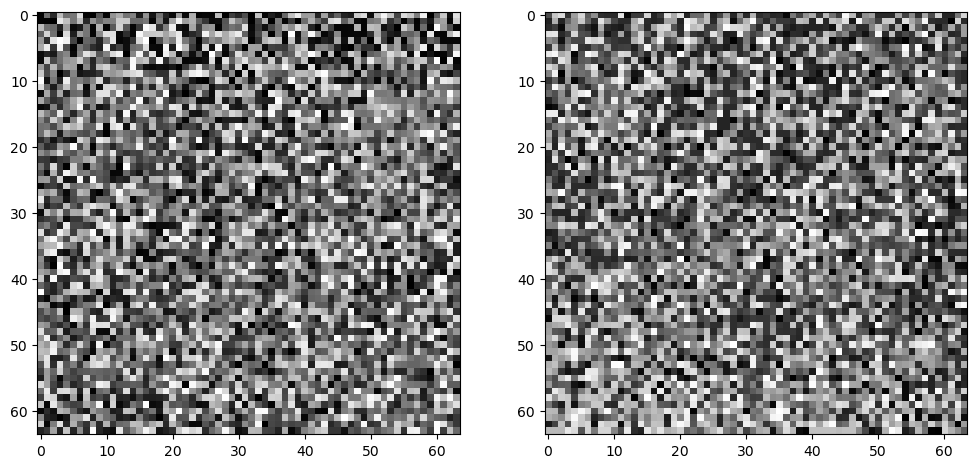

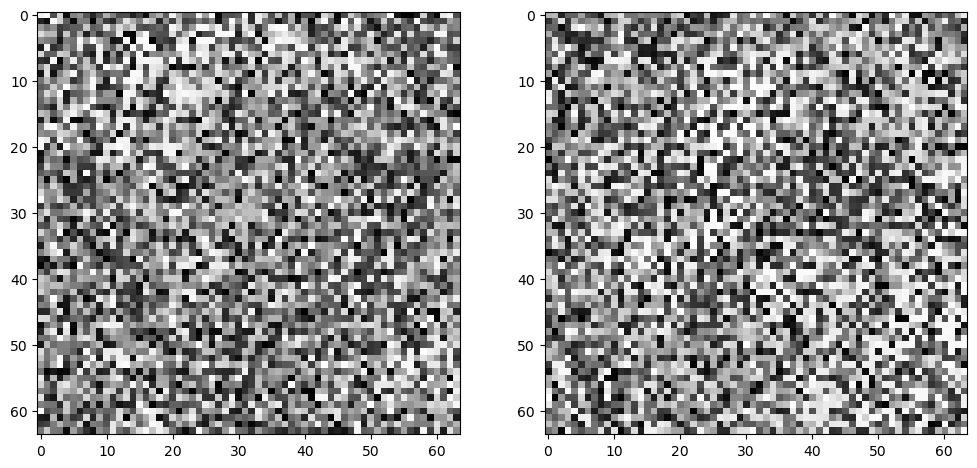

In [7]:
# Plot images after adding noise
for noise_level in noise_levels:

    X_noisy = add_noise(X, noise_level)
    
    # Set plot size
    plt.rcParams['figure.figsize'] = [12, 6]

    # Set random seed
    random.seed(1000012)
    
    # Generate random indices
    ssc = random.sample(list(np.where(y == 0)[0]), 2)
    ssd = random.sample(list(np.where(y == 1)[0]), 2)
    
    # Plot images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(rotateM(X_noisy[ssc[0], :].reshape(64, 64)), cmap='gray')
    plt.xlabel("")
    plt.ylabel("")
    
    plt.subplot(1, 2, 2)
    plt.imshow(rotateM(X_noisy[ssc[1], :].reshape(64, 64)), cmap='gray')
    plt.xlabel("")
    plt.ylabel("")
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(rotateM(X_noisy[ssd[0], :].reshape(64, 64)), cmap='gray')
    plt.xlabel("")
    plt.ylabel("")
    
    plt.subplot(1, 2, 2)
    plt.imshow(rotateM(X_noisy[ssd[1], :].reshape(64, 64)), cmap='gray')
    plt.xlabel("")
    plt.ylabel("")
    
    plt.show()

# Step 3: Model Training and Evaluation

In [8]:
# We treat pixels as features
# RandomForest Classifier and GradientBoosting Classifier, no hyperparameter tuning applied

results = []
feature_importance_results = []

for noise_level in noise_levels:
    
    X_noisy = add_noise(X, noise_level)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)
    
    # Train RandomForest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    rf_pred = rf_classifier.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred, average='macro', zero_division=1)
    rf_recall = recall_score(y_test, rf_pred, average='macro')
    rf_f1 = f1_score(y_test, rf_pred, average='macro')
    
    # Train GradientBoosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_classifier.fit(X_train, y_train)
    gb_pred = gb_classifier.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_precision = precision_score(y_test, gb_pred, average='macro', zero_division=1)
    gb_recall = recall_score(y_test, gb_pred, average='macro')
    gb_f1 = f1_score(y_test, gb_pred, average='macro')
    
    # Feature Importance Analysis
    rf_feature_importance = rf_classifier.feature_importances_
    gb_feature_importance = gb_classifier.feature_importances_
    
    feature_importance_results.append({
        'Noise Level': noise_level,
        'RF Feature Importance': rf_feature_importance,
        'GB Feature Importance': gb_feature_importance
    })
    
    results.append({
        'Noise Level': noise_level,
        'RF Accuracy': rf_accuracy, 'RF Precision': rf_precision,
        'RF Recall': rf_recall, 'RF F1': rf_f1,
        'GB Accuracy': gb_accuracy, 'GB Precision': gb_precision,
        'GB Recall': gb_recall, 'GB F1': gb_f1
    })

# Display results
results_df = pd.DataFrame(results)
feature_importance_df = pd.DataFrame(feature_importance_results)

print("Results of classification:")
print(results_df)

print("\nFeature Importance Comparison:")
print(feature_importance_df)

Results of classification:
   Noise Level  RF Accuracy  RF Precision  RF Recall     RF F1  GB Accuracy  \
0          0.0        0.725      0.719697   0.722506  0.720635        0.725   
1          0.2        0.775      0.770202   0.773657  0.771429        0.700   
2          0.4        0.750      0.746867   0.751918  0.747475        0.750   
3          0.6        0.750      0.754386   0.759591  0.749373        0.675   
4          0.8        0.550      0.546366   0.547315  0.545455        0.575   

   GB Precision  GB Recall     GB F1  
0      0.725000   0.730179  0.723444  
1      0.693095   0.693095  0.693095  
2      0.754386   0.759591  0.749373  
3      0.669192   0.671355  0.669841  
4      0.575000   0.576726  0.572596  

Feature Importance Comparison:
   Noise Level                              RF Feature Importance  \
0          0.0  [0.0005237619257823536, 0.0, 0.0, 0.0004390999...   
1          0.2  [0.0, 0.00023504617864005442, 0.0, 0.000248601...   
2          0.4  [0.002221

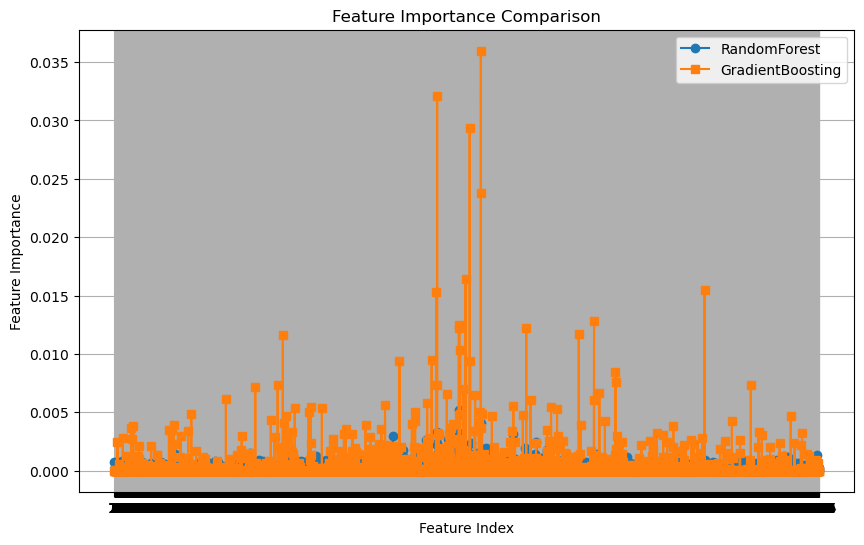

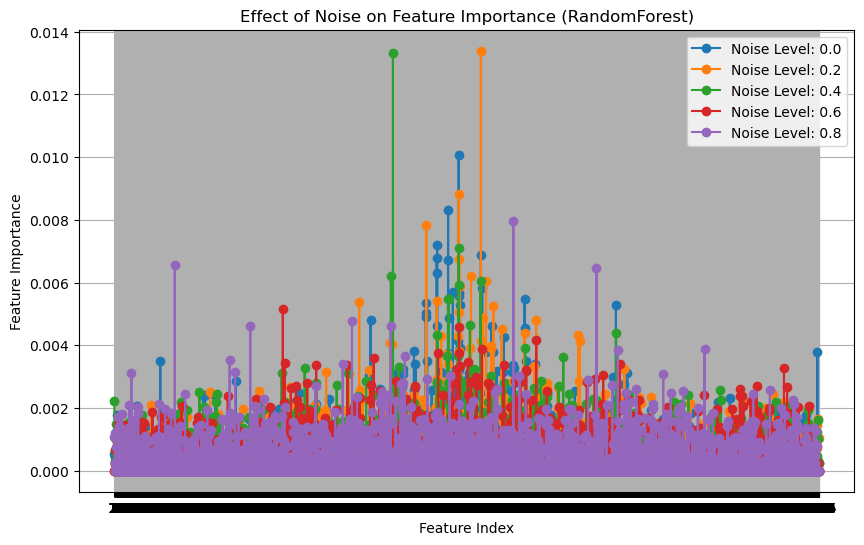

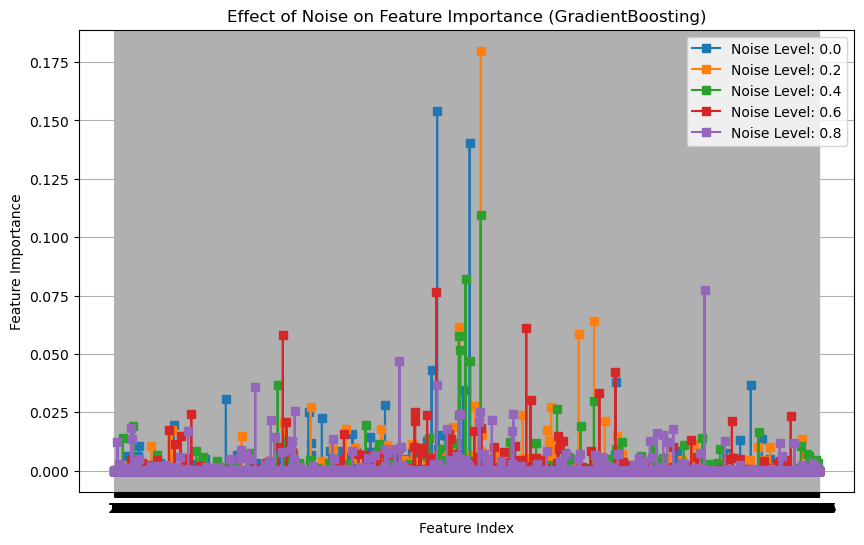

In [9]:
# Function to plot feature importance
def plot_feature_importance(importance_rf, importance_gb, noise_levels):
    plt.figure(figsize=(10, 6))
    plt.plot(importance_rf, label='RandomForest', marker='o')
    plt.plot(importance_gb, label='GradientBoosting', marker='s')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importance Comparison')
    plt.legend()
    plt.xticks(range(len(importance_rf)), range(1, len(importance_rf) + 1))
    plt.grid(True)
    plt.show()

# Function to plot effect of noise on feature importance for RandomForest
def plot_effect_of_noise_rf(feature_importance_df):
    plt.figure(figsize=(10, 6))
    for index, row in feature_importance_df.iterrows():
        plt.plot(row['RF Feature Importance'], label=f'Noise Level: {row["Noise Level"]}', marker='o')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Effect of Noise on Feature Importance (RandomForest)')
    plt.legend()
    plt.xticks(range(len(row['RF Feature Importance'])), range(1, len(row['RF Feature Importance']) + 1))
    plt.grid(True)
    plt.show()

# Function to plot effect of noise on feature importance for GradientBoosting
def plot_effect_of_noise_gb(feature_importance_df):
    plt.figure(figsize=(10, 6))
    for index, row in feature_importance_df.iterrows():
        plt.plot(row['GB Feature Importance'], label=f'Noise Level: {row["Noise Level"]}', marker='s')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Effect of Noise on Feature Importance (GradientBoosting)')
    plt.legend()
    plt.xticks(range(len(row['GB Feature Importance'])), range(1, len(row['GB Feature Importance']) + 1))
    plt.grid(True)
    plt.show()



# Extract feature importance from the dataframe
rf_importance_means = feature_importance_df['RF Feature Importance'].mean(axis=0)
gb_importance_means = feature_importance_df['GB Feature Importance'].mean(axis=0)

# Plot overlap of important features
plot_feature_importance(rf_importance_means, gb_importance_means, range(1, len(rf_importance_means) + 1))

# Plot effect of noise on feature importance for RandomForest
plot_effect_of_noise_rf(feature_importance_df)

# Plot effect of noise on feature importance for GradientBoosting
plot_effect_of_noise_gb(feature_importance_df)

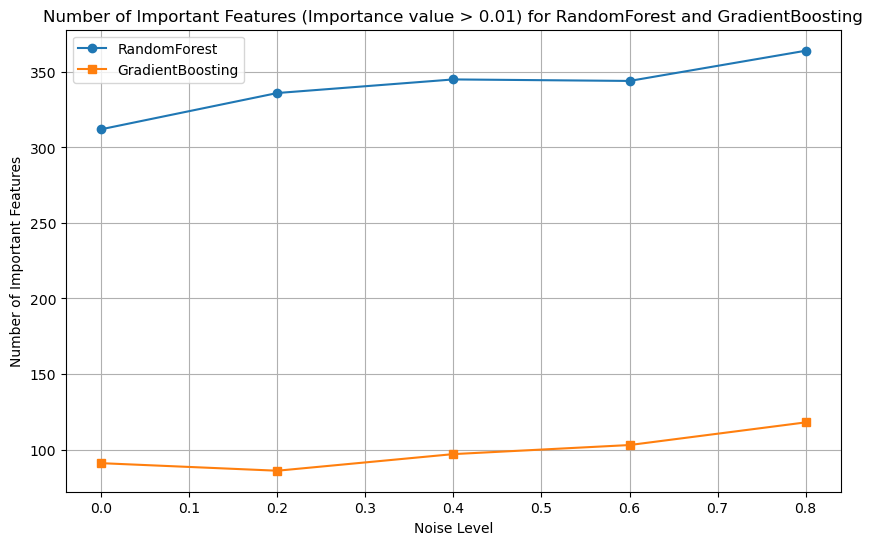

In [10]:
# Function to count the number of important features above a threshold
def count_important_features(importance, threshold):
    return np.sum(importance > threshold)

# Threshold for importance value
threshold = 0.001

# Count the number of important features for each noise level and classifier
important_features_rf = [count_important_features(importance, threshold) for importance in feature_importance_df['RF Feature Importance']]
important_features_gb = [count_important_features(importance, threshold) for importance in feature_importance_df['GB Feature Importance']]

# Plot the number of important features for RandomForest and GradientBoosting
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, important_features_rf, label='RandomForest', marker='o')
plt.plot(noise_levels, important_features_gb, label='GradientBoosting', marker='s')
plt.xlabel('Noise Level')
plt.ylabel('Number of Important Features')
plt.title('Number of Important Features (Importance value > 0.01) for RandomForest and GradientBoosting')
plt.legend()
plt.grid(True)
plt.show()